In [1]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

#suppress warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
glass_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')

In [3]:
#look at formatting of entries
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#display null values and data types
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#look at distribution of data
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [7]:
#numerical features
numerical = [
    'RI',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Ba',
    'Fe'
]

#categorical features
categorical = [
    'Type'
]

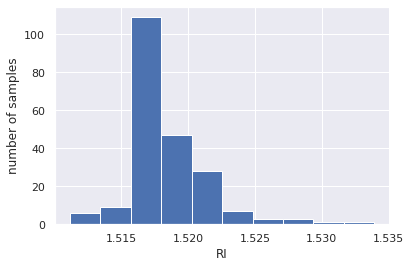

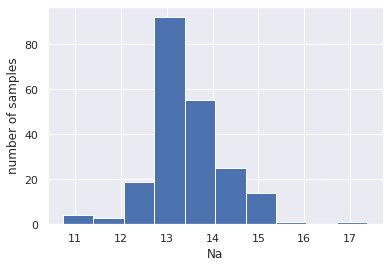

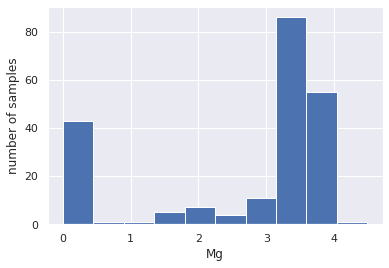

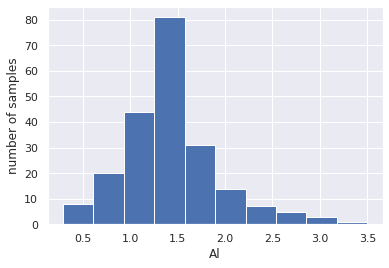

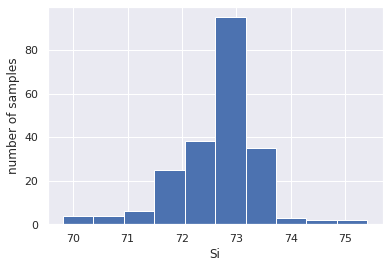

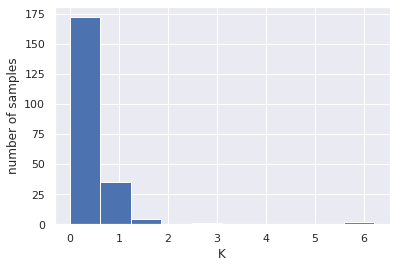

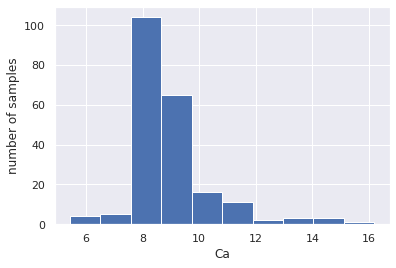

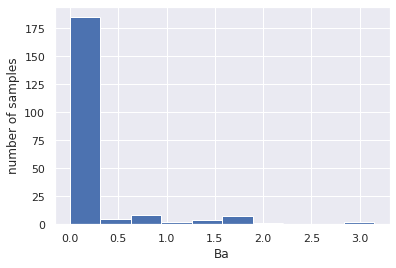

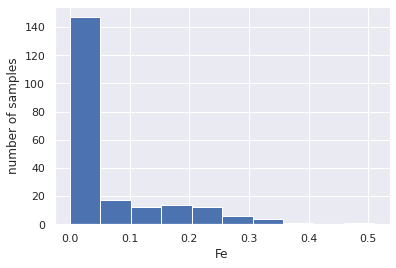

In [8]:
#look at numerical data distribution
for i in glass_data[numerical].columns:
    plt.hist(glass_data[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()

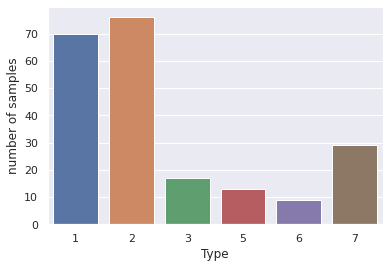

In [9]:
#look at categorical data distribution
for i in glass_data[categorical].columns:
    sns.barplot(x=glass_data[categorical][i].value_counts().index,y=glass_data[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()

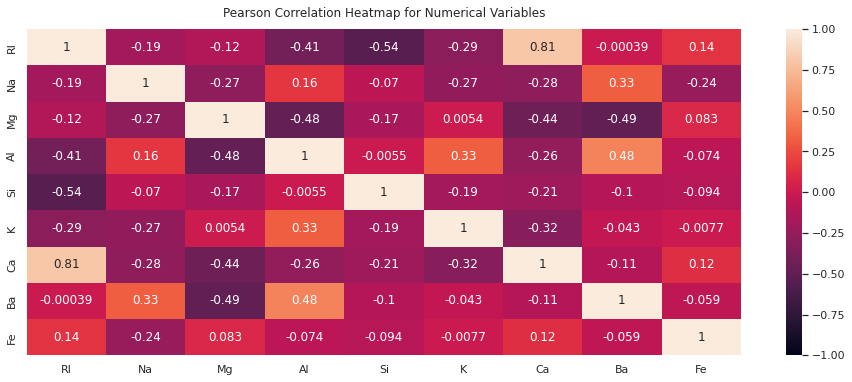

In [10]:
#heat map to see numerical correlations, pearson measures monotonic relationship (numerical or ordinal categorical)
plt.figure(figsize=(16, 6))
sns.heatmap(glass_data[numerical].corr(method='pearson'), vmin=-1, vmax=1, annot=True)
plt.title('Pearson Correlation Heatmap for Numerical Variables', fontdict={'fontsize':12}, pad=12);

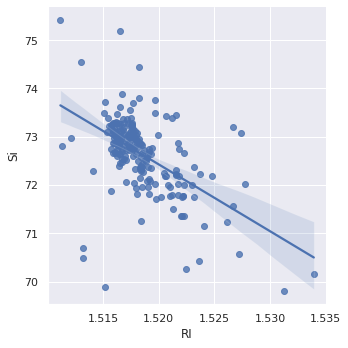

In [11]:
#strongest linear relationship according to correlation heatmap (-0.54)
sns.lmplot(x='RI', y='Si', data=glass_data)
plt.show()

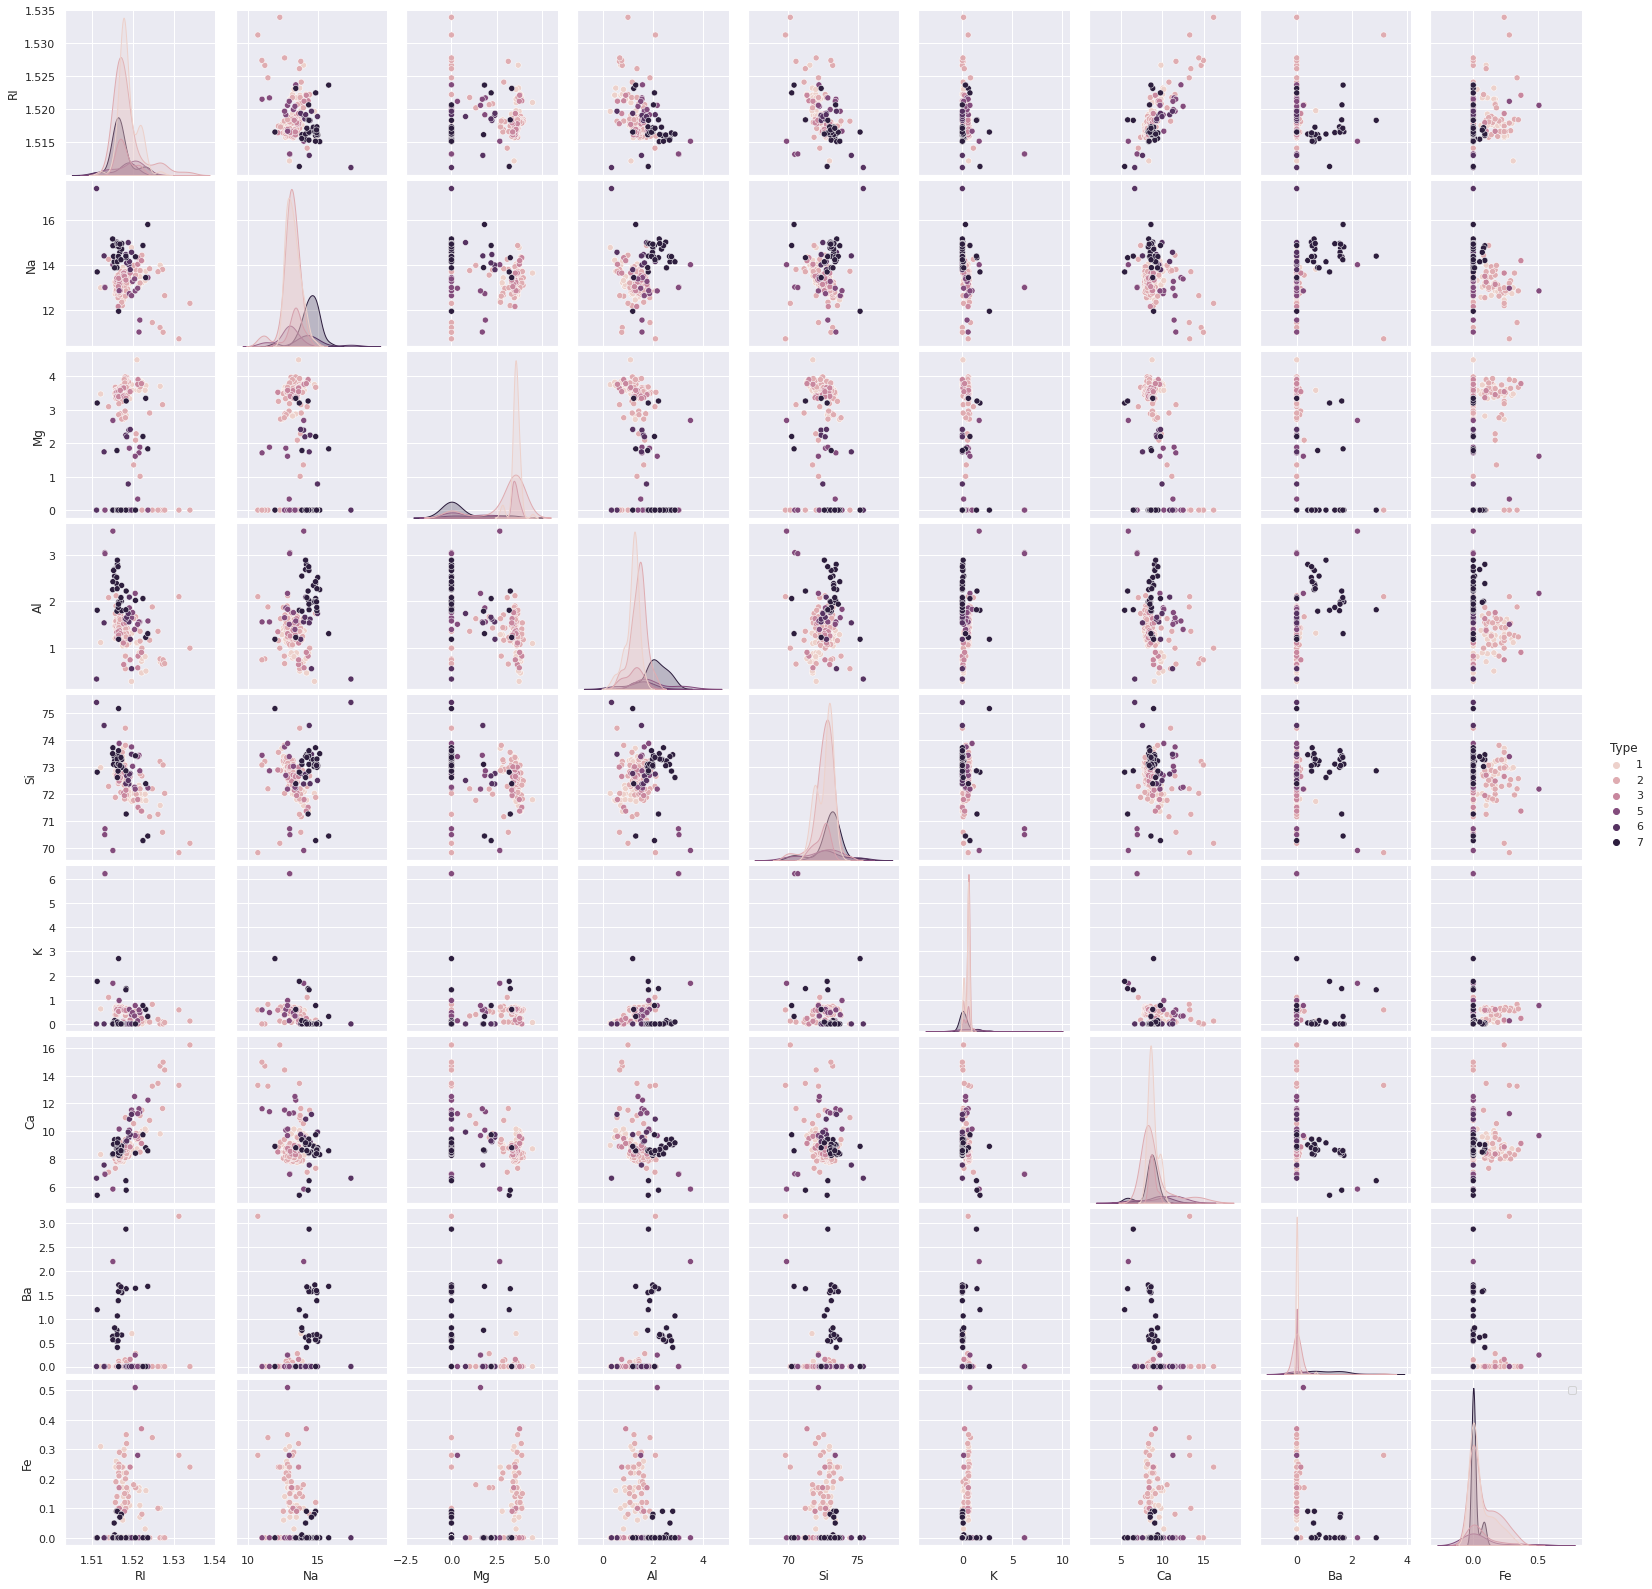

In [12]:
#look at how target is distributed among variables
sns.pairplot(glass_data,hue='Type')
plt.legend()
plt.show()

In [13]:
#remove target variable from categorical array
categorical.remove('Type')

#change dtype of categorical features to object
glass_data[categorical]=glass_data[categorical].astype('object')

#copy of variables and target
X = glass_data.copy()
y = X.pop('Type')

In [14]:
X_mi = X.copy()

In [15]:
#label encoding for categorical variables
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

#all discrete features have int dtypes
discrete_features = X_mi.dtypes == int

In [16]:
discrete_features

RI    False
Na    False
Mg    False
Al    False
Si    False
K     False
Ca    False
Ba    False
Fe    False
dtype: bool

In [17]:
#use classification since the target variable is discrete
from sklearn.feature_selection import mutual_info_classif

#define a function to produce mutual information scores
def make_mi_scores(X_mi, y, discrete_features):
    mi_scores = mutual_info_classif(X_mi, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#compute mutual information scores
mi_scores = make_mi_scores(X_mi, y, discrete_features)
mi_scores

Al    0.435259
Mg    0.391205
Ba    0.352525
RI    0.351028
K     0.286125
Na    0.282890
Ca    0.239424
Si    0.097300
Fe    0.029440
Name: MI Scores, dtype: float64

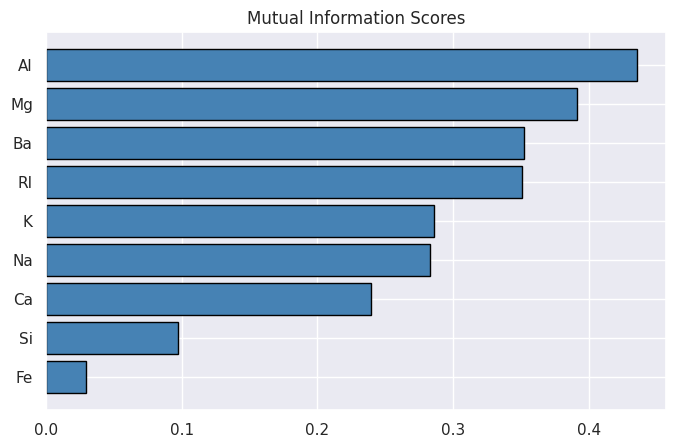

In [18]:
#define a function to plot mutual information scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color='steelblue', edgecolor='black')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

#plot the scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

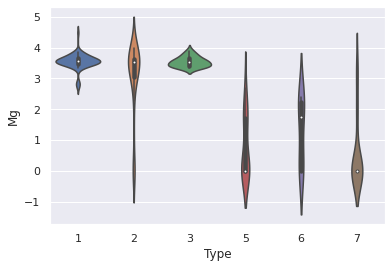

In [19]:
#plot Mg and glass type
sns.violinplot(y=X_mi.Mg, x=y);

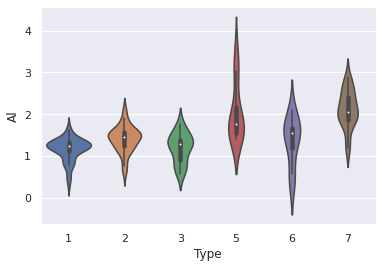

In [20]:
#plot Al and glass type
sns.violinplot(y=X_mi.Al, x=y);

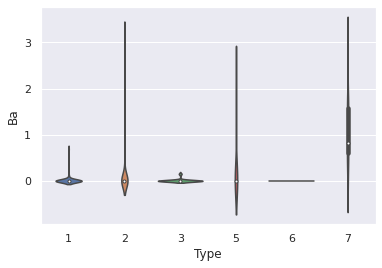

In [21]:
#plot Ba and glass type
sns.violinplot(y=X_mi.Ba, x=y);

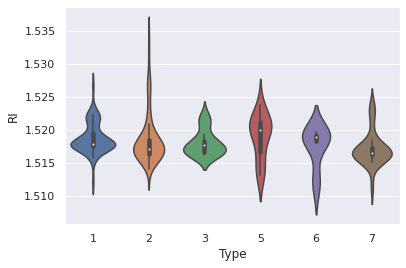

In [22]:
#plot RI and glass type
sns.violinplot(y=X_mi.RI, x=y);

In [23]:
#select all data except CUST_ID
X_for_PCA = X.copy()

#standardize
X_for_PCA_scaled = (X_for_PCA - X_for_PCA.mean(axis=0)) / X_for_PCA.std(axis=0)

from sklearn.decomposition import PCA

#create principal components
pca = PCA(len(X.columns))
X_pca = pca.fit_transform(X_for_PCA_scaled)

#convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

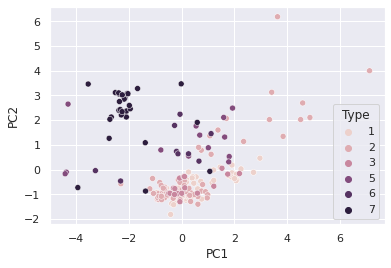

In [24]:
#plot data using principal components
sns.scatterplot(x=X_pca.loc[:,'PC1'],y=X_pca.loc[:,'PC2'], hue=y)
plt.show()

In [25]:
#determine loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
RI,0.545177,0.285683,0.086911,0.147381,-0.073543,0.115288,0.081867,-0.752216,0.025732
Na,-0.258126,0.270350,-0.384920,0.491242,0.153683,-0.558118,0.148580,-0.127693,-0.311937
Mg,0.110881,-0.593558,0.008418,0.378786,0.123509,0.308186,-0.206045,-0.076891,-0.577273
Al,-0.428709,0.295212,0.329237,-0.137506,0.014109,-0.018857,-0.699236,-0.274441,-0.192227
Si,-0.228836,-0.155099,-0.458709,-0.652538,0.008500,0.086098,0.216067,-0.379923,-0.298073
K,-0.219344,-0.153970,0.662574,-0.038535,-0.307040,-0.243632,0.504121,-0.109812,-0.260509
Ca,0.492306,0.345380,-0.000985,-0.276443,-0.188188,-0.148669,-0.099135,0.398705,-0.579323
Ba,-0.250375,0.484702,0.074055,0.133175,0.251334,0.657219,0.351783,0.144932,-0.198228
Fe,0.185842,-0.062039,0.284451,-0.230492,0.873264,-0.243044,0.073721,-0.016271,-0.014669


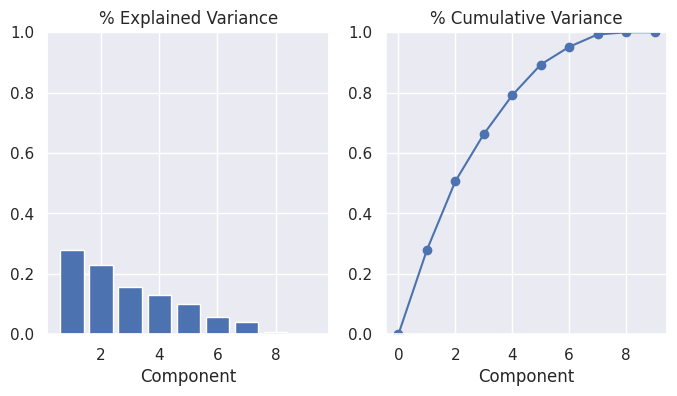

In [26]:
#determine % explained variance and use % cumulative variance for elbow method to determine number of PCs

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

In [27]:
X['PCA'] = X['Ca']*X['Ba']*X['RI']/(X['Al']*X['Na'])

In [28]:
#standardize for kmeans
from sklearn.preprocessing import StandardScaler

kmeans_columns = X.columns
X_kmeans = X.loc[:, kmeans_columns]

standardize = StandardScaler()
X_kmeans = standardize.fit_transform(X_kmeans)

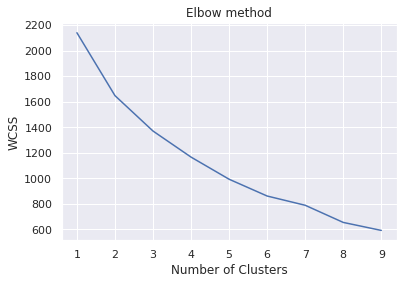

In [29]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=1).fit(X_kmeans) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
#generate clusters to determine different clusters to advertise to

kmeans = KMeans(n_clusters=7, random_state = 1)
X["clusters"] = kmeans.fit_predict(X_kmeans)

X["clusters"] = X["clusters"].astype("category")
categorical = ['clusters']

In [31]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [32]:
#get feature names
X = pd.concat([X[numerical],pd.get_dummies(X[categorical])],axis=1)
feature_names = X.columns

y = pd.get_dummies(y)

# train/test split with stratify making sure classes are evenlly represented across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=1)

#define scaler
scaler=MinMaxScaler()

#apply preprocessing to split data with scaler
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

In [33]:
#import ml algorithms
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.ensemble import RandomForestClassifier

In [34]:
#random forest classifier with five-fold cross validation
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(mean(cv), '+/-', std(cv))

0.63125 +/- 0.10532687216470447


In [35]:
#ml algorithm tuner
from sklearn.model_selection import GridSearchCV 

#performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(classifier.best_score_),str(classifier.cv_results_['std_test_score'][classifier.best_index_])))
    print('Best Parameters: ' + str(classifier.best_params_))

In [36]:
#random forest performance tuner
rf = RandomForestClassifier(random_state = 1)
param_grid =  {
                'n_estimators': [110],
                'bootstrap': [True,False], #bagging (T) vs. pasting (F)
                 'max_depth': [14],
                'max_features': ['auto','sqrt'],
#                 'min_samples_leaf': np.arange(2,10,2),
                 'min_samples_split': np.arange(2,10,2)
              }
clf_rf_rnd = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Best Score: 0.68125 +/- 0.0914296177395487
Best Parameters: {'bootstrap': False, 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 110}


In [37]:
#import evaluation tools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt

In [38]:
#create random forest model with tuned parameters
rf = RandomForestClassifier(random_state = 1, bootstrap= False, max_features= 'auto', max_depth=14, min_samples_split=2, n_estimators= 110)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#assess accuracy
print('RandomForestClassifier test accuracy: {}'.format(accuracy_score(y_test, y_pred)))

RandomForestClassifier test accuracy: 0.7592592592592593


In [39]:
#rename columns to 0,1,2,3,4,5 (original target classes: 1,2,3,5,6,7)
y_test.columns = pd.DataFrame(y_pred).columns

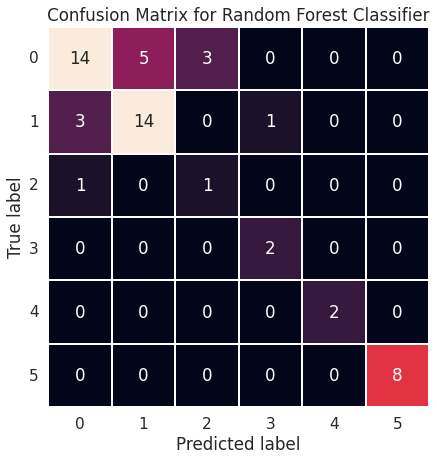

In [40]:
#plot as heatmap
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)

#create and reshape confusion matrix data
matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(matrix.T, square=True, annot=True,cbar=False, linewidths=0.2)


#plot settings
class_names = y_test.columns
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [41]:
#import packages
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
from scipy import interp

In [42]:
#number of classes in target
n_classes = y.shape[1]

#compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_test)[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(y_test).ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

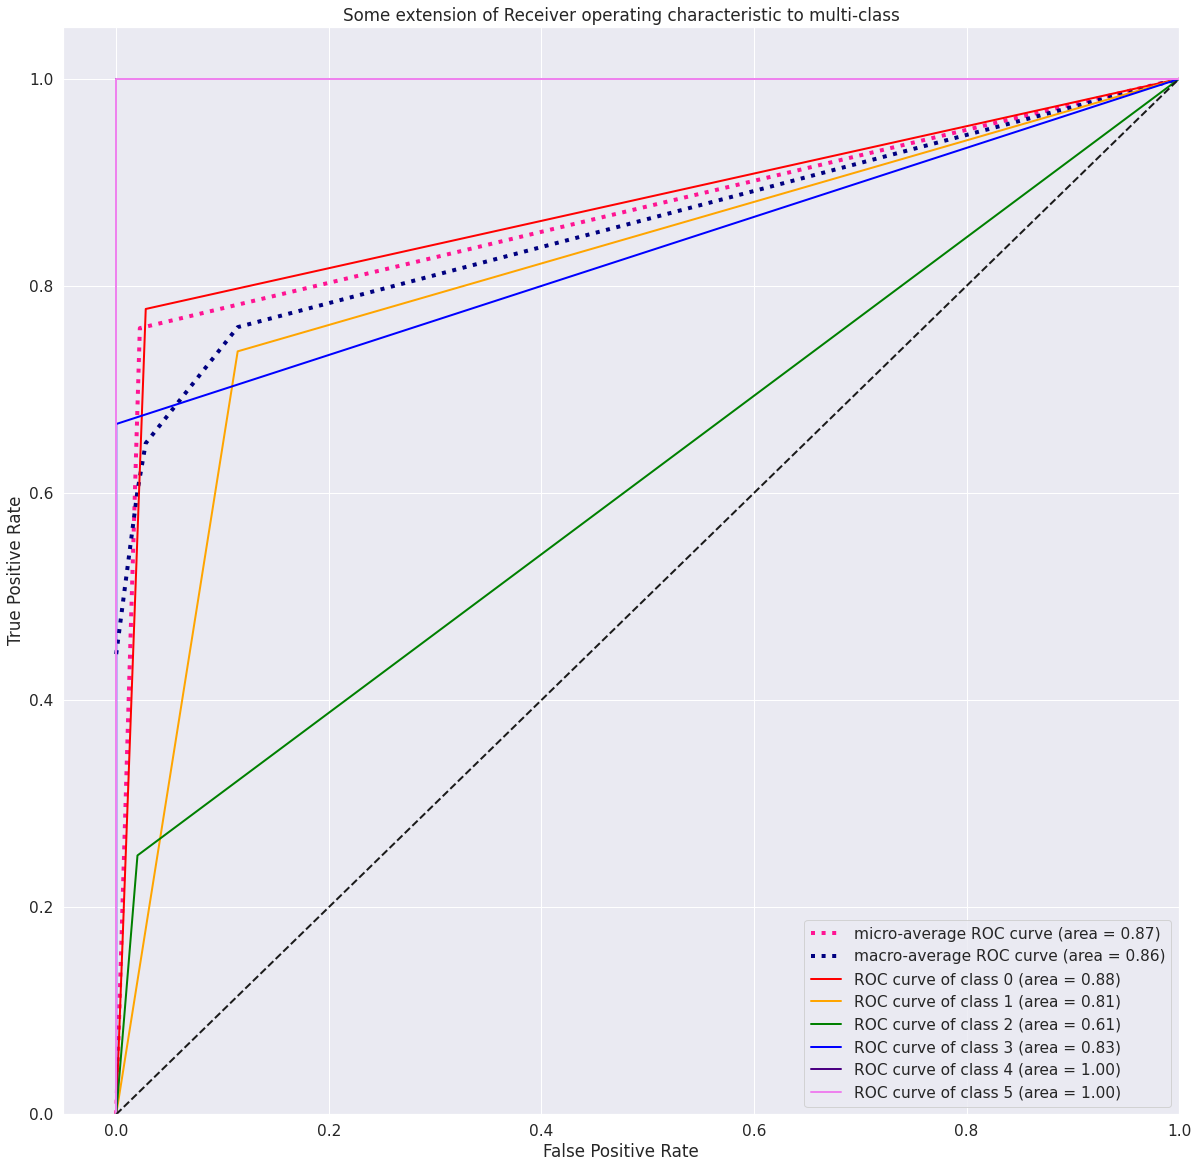

In [43]:
#first aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20, 20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

lw=2
colors = cycle(['red', 'orange', 'green', 'blue', 'indigo', 'violet'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [44]:
#predictive probability calculation
y_prob = rf.predict_proba(X_test)

#put into correct shape for AUC
y_prob = np.transpose([pred[:, 1] for pred in y_prob])

In [45]:
#calculate AUC scores
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.958829 (macro),
0.935955 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.958829 (macro),
0.935955 (weighted by prevalence)


In [46]:
from sklearn.metrics import precision_recall_fscore_support
print('Macro: {}'.format(precision_recall_fscore_support(np.array(y_test).argmax(axis=1), np.array(y_prob).argmax(axis=1), average='macro')))
print('Micro: {}'.format(precision_recall_fscore_support(np.array(y_test).argmax(axis=1), np.array(y_prob).argmax(axis=1), average='micro')))
print('Weighted: {}'.format(precision_recall_fscore_support(np.array(y_test).argmax(axis=1), np.array(y_prob).argmax(axis=1), average='weighted')))

Macro: (0.7862448009506832, 0.756091617933723, 0.7523035230352303, None)
Micro: (0.7962962962962963, 0.7962962962962963, 0.7962962962962963, None)
Weighted: (0.7958341585792567, 0.7962962962962963, 0.7881963264077085, None)
